In [21]:
import zipfile
import os

# Ruta del archivo zip
zip_file_path = 'data-export-254454-240911-15-45.zip'
# Carpeta donde se extraerán los archivos
extraction_folder = 'archivos extraidos'

# Crear la carpeta de extracción si no existe
os.makedirs(extraction_folder, exist_ok=True)

# Abre el archivo zip
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # Lista los archivos en el archivo zip
    file_list = zip_ref.namelist()
    print(f"Archivos en el archivo zip: {file_list}")
    
    # Filtrar y extraer solo archivos CSV
    csv_files = [file_name for file_name in file_list if file_name.endswith('.csv')]
    
    if not csv_files:
        print("No se encontraron archivos CSV en el archivo zip.")
    else:
        for csv_file in csv_files:
            # Extrae el archivo CSV
            zip_ref.extract(csv_file, path=extraction_folder)
            print(f"Archivo {csv_file} extraído a {extraction_folder}/{csv_file}")

print("Extracción completada.")


Archivos en el archivo zip: ['EF63E8-UTeM_CIER_Sala_Mestros-1SEC.csv', 'EF63E8-UTeM_CIER_Sala_Mestros-1MIN.csv', 'EF63E8-UTeM_CIER_Sala_Mestros-15MIN.csv', 'EF63E8-UTeM_CIER_Sala_Mestros-1H.csv', 'EF63E8-UTeM_CIER_Sala_Mestros-1DAY.csv']
Archivo EF63E8-UTeM_CIER_Sala_Mestros-1SEC.csv extraído a archivos extraidos/EF63E8-UTeM_CIER_Sala_Mestros-1SEC.csv
Archivo EF63E8-UTeM_CIER_Sala_Mestros-1MIN.csv extraído a archivos extraidos/EF63E8-UTeM_CIER_Sala_Mestros-1MIN.csv
Archivo EF63E8-UTeM_CIER_Sala_Mestros-15MIN.csv extraído a archivos extraidos/EF63E8-UTeM_CIER_Sala_Mestros-15MIN.csv
Archivo EF63E8-UTeM_CIER_Sala_Mestros-1H.csv extraído a archivos extraidos/EF63E8-UTeM_CIER_Sala_Mestros-1H.csv
Archivo EF63E8-UTeM_CIER_Sala_Mestros-1DAY.csv extraído a archivos extraidos/EF63E8-UTeM_CIER_Sala_Mestros-1DAY.csv
Extracción completada.


Rango de tiempo disponible: 2024-07-09 00:00:00 a 2024-11-09 00:00:00
Variables disponibles para graficar:
1. UTeM CIER Sala Mestros-Mains_A (kWhs)
2. UTeM CIER Sala Mestros-Mains_B (kWhs)
3. UTeM CIER Sala Mestros-Mains_C (kWhs)
4. UTeM CIER Sala Mestros-Air Conditioner-AC Sala Maestros 1 (kWhs)
5. UTeM CIER Sala Mestros-Air Conditioner-AC Direccion 1 (kWhs)
6. UTeM CIER Sala Mestros-Air Conditioner-AC Rack (kWhs)
7. UTeM CIER Sala Mestros-Air Conditioner-AC Aula Medios (kWhs)
8. UTeM CIER Sala Mestros-Sub Panel-Tab Secundario L1 (kWhs)
9. UTeM CIER Sala Mestros-Sub Panel-Tab Secundario L2 (kWhs)
10. UTeM CIER Sala Mestros-Sub Panel-Tab Secundario L3 (kWhs)
11. UTeM CIER Sala Mestros-Air Conditioner-AC Sala Maestros 2 (kWhs)
12. UTeM CIER Sala Mestros-Air Conditioner-AC Direccion 2 (kWhs)
13. UTeM CIER Sala Mestros-Air Conditioner-AC Sala Juntas (kWhs)
14. UTeM CIER Sala Mestros-Air Conditioner-AC Cubiculos (kWhs)
15. UTeM CIER Sala Mestros-Other-Circuit_12 (kWhs)
16. UTeM CIER Sala M

TypeError: ylabel() missing 1 required positional argument: 'ylabel'

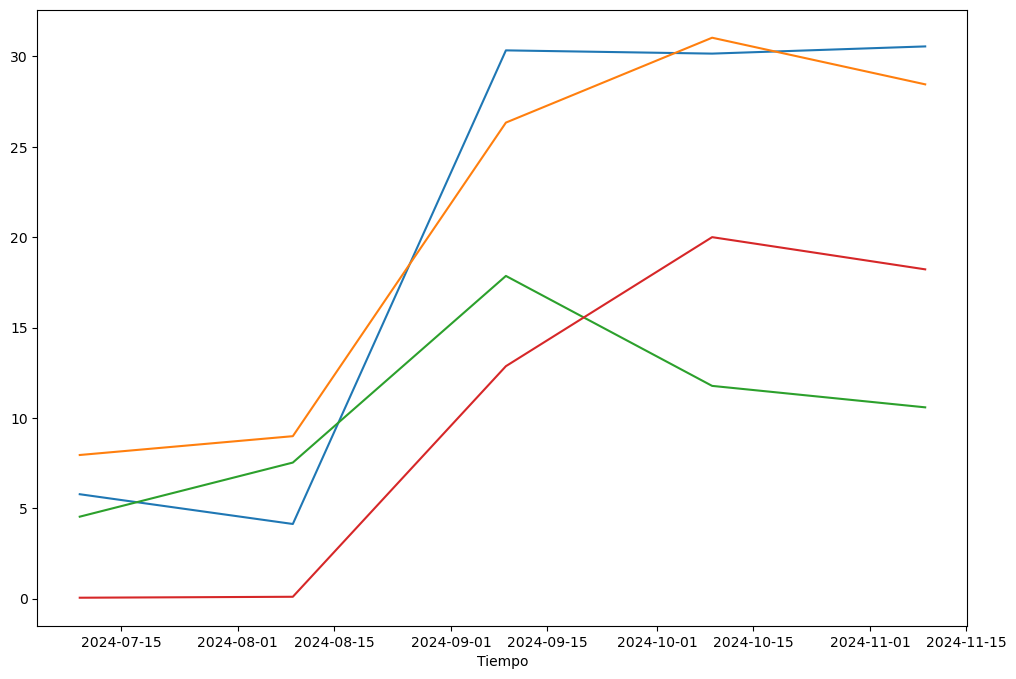

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Función para cargar el archivo CSV
def load_csv(file_path):
    return pd.read_csv(file_path)

# Función para mostrar el rango de fechas y las variables disponibles
def show_summary(df):
    # Convertir la columna de tiempo al tipo datetime
    df['Time Bucket (America/Costa_Rica)'] = pd.to_datetime(df['Time Bucket (America/Costa_Rica)'], format='%d/%m/%Y %H:%M:%S')
    
    # Mostrar rango de tiempo
    min_date = df['Time Bucket (America/Costa_Rica)'].min()
    max_date = df['Time Bucket (America/Costa_Rica)'].max()
    print(f"Rango de tiempo disponible: {min_date} a {max_date}")
    
    # Filtrar las columnas que no son de tipo fecha
    non_date_columns = [col for col in df.columns if col != 'Time Bucket (America/Costa_Rica)']
    print("Variables disponibles para graficar:")
    for i, col in enumerate(non_date_columns, start=1):
        print(f"{i}. {col}")
    
    return min_date, max_date, non_date_columns

# Función para limpiar nombres de variables
def clean_variable_name(name):
    return name.replace('UTeM CIER Sala Mestros', '').strip()

# Función para graficar los datos
def plot_data(df, start_date, end_date, variables):
    # Filtrar el DataFrame según el rango de fechas
    df_filtered = df[(df['Time Bucket (America/Costa_Rica)'] >= start_date) & (df['Time Bucket (America/Costa_Rica)'] <= end_date)]
    
    # Graficar las variables seleccionadas
    plt.figure(figsize=(12, 8))
    for variable in variables:
        if variable in df.columns:
            plt.plot(df_filtered['Time Bucket (America/Costa_Rica)'], df_filtered[variable], label=clean_variable_name(variable))
    
    plt.xlabel('Tiempo')
    plt.ylabel()
    plt.title('SALA DE MAESTROS')
    plt.legend(loc='best')  # Mover la leyenda a la mejor posición
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Ruta del archivo CSV (ajusta la ruta según sea necesario)
csv_file_path = 'archivos extraidos/EF63E8-UTeM_CIER_Sala_Mestros-1DAY.csv'

# Cargar el archivo CSV
df = load_csv(csv_file_path)

# Mostrar resumen y opciones al usuario
min_date, max_date, variables = show_summary(df)

# Solicitar al usuario que seleccione el rango de fechas
start_date = pd.to_datetime(input(f"Selecciona la fecha inicial (formato: {min_date:%d/%m/%Y %H:%M:%S}): "), format='%d/%m/%Y %H:%M:%S')
end_date = pd.to_datetime(input(f"Selecciona la fecha final (formato: {max_date:%d/%m/%Y %H:%M:%S}): "), format='%d/%m/%Y %H:%M:%S')

# Solicitar al usuario que seleccione las variables a graficar
selected_indices = input("Selecciona las variables a graficar (ingresa los números separados por comas): ").split(',')
selected_indices = [int(index.strip()) - 1 for index in selected_indices]  # Convertir a índices de columnas

selected_variables = [variables[i] for i in selected_indices]

# Graficar los datos seleccionados
plot_data(df, start_date, end_date, selected_variables)

Rango de tiempo disponible: 2024-07-09 10:22:00 a 2024-11-09 15:44:00
Variables disponibles para graficar:
1. UTeM CIER Sala Mestros-Mains_A (kWatts)
2. UTeM CIER Sala Mestros-Mains_B (kWatts)
3. UTeM CIER Sala Mestros-Mains_C (kWatts)
4. UTeM CIER Sala Mestros-Air Conditioner-AC Sala Maestros 1 (kWatts)
5. UTeM CIER Sala Mestros-Air Conditioner-AC Direccion 1 (kWatts)
6. UTeM CIER Sala Mestros-Air Conditioner-AC Rack (kWatts)
7. UTeM CIER Sala Mestros-Air Conditioner-AC Aula Medios (kWatts)
8. UTeM CIER Sala Mestros-Sub Panel-Tab Secundario L1 (kWatts)
9. UTeM CIER Sala Mestros-Sub Panel-Tab Secundario L2 (kWatts)
10. UTeM CIER Sala Mestros-Sub Panel-Tab Secundario L3 (kWatts)
11. UTeM CIER Sala Mestros-Air Conditioner-AC Sala Maestros 2 (kWatts)
12. UTeM CIER Sala Mestros-Air Conditioner-AC Direccion 2 (kWatts)
13. UTeM CIER Sala Mestros-Air Conditioner-AC Sala Juntas (kWatts)
14. UTeM CIER Sala Mestros-Air Conditioner-AC Cubiculos (kWatts)
15. UTeM CIER Sala Mestros-Other-Circuit_12

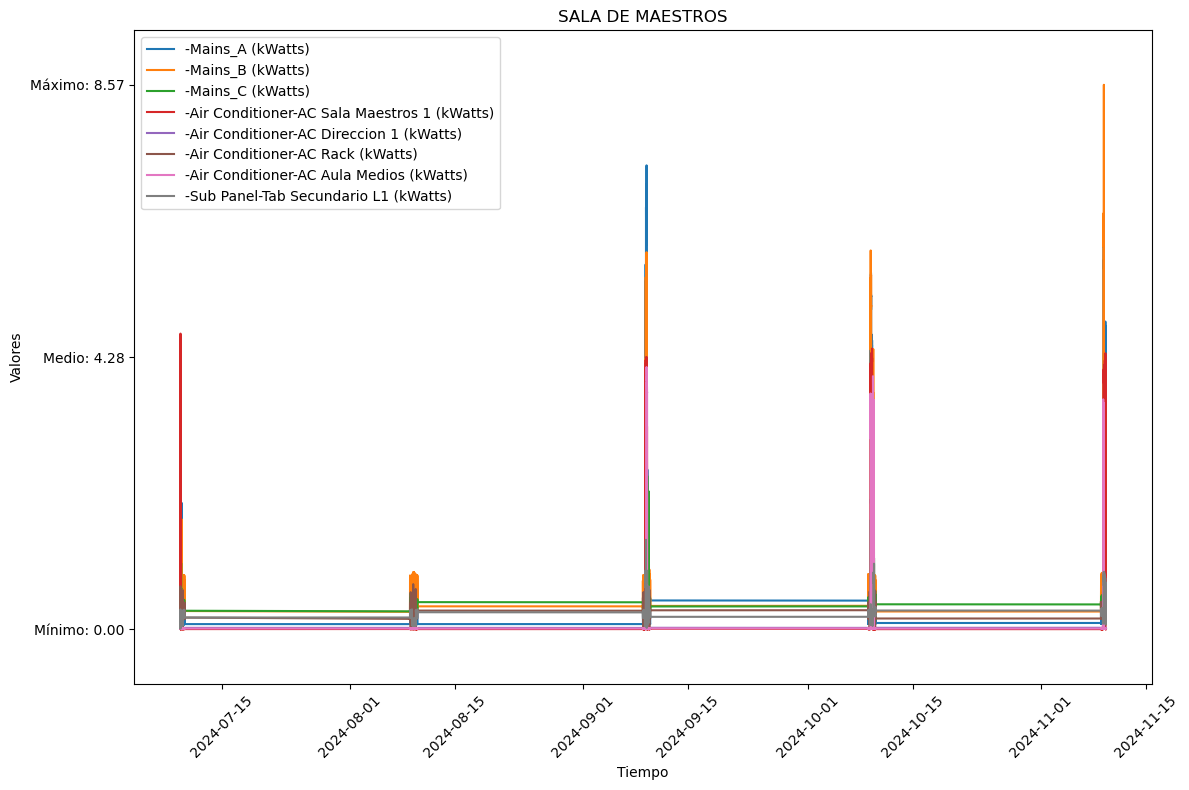

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Función para cargar el archivo CSV
def load_csv(file_path):
    return pd.read_csv(file_path)

# Función para mostrar el rango de fechas y las variables disponibles
def show_summary(df):
    # Convertir la columna de tiempo al tipo datetime
    df['Time Bucket (America/Costa_Rica)'] = pd.to_datetime(df['Time Bucket (America/Costa_Rica)'], format='%d/%m/%Y %H:%M:%S')
    
    # Mostrar rango de tiempo
    min_date = df['Time Bucket (America/Costa_Rica)'].min()
    max_date = df['Time Bucket (America/Costa_Rica)'].max()
    print(f"Rango de tiempo disponible: {min_date} a {max_date}")
    
    # Filtrar las columnas que no son de tipo fecha
    non_date_columns = [col for col in df.columns if col != 'Time Bucket (America/Costa_Rica)']
    print("Variables disponibles para graficar:")
    for i, col in enumerate(non_date_columns, start=1):
        print(f"{i}. {col}")
    
    return min_date, max_date, non_date_columns

# Función para limpiar nombres de variables
def clean_variable_name(name):
    return name.replace('UTeM CIER Sala Mestros', '').strip()

# Función para mostrar solo el tiempo inicial y final en una tabla
def print_date_range(start_date, end_date):
    # Crear un DataFrame con las fechas seleccionadas
    df_dates = pd.DataFrame({
        'Fecha Inicial': [start_date],
        'Fecha Final': [end_date]
    })
    
    # Mostrar el rango de fechas en formato de tabla
    print("\nRango de fechas seleccionadas:")
    print(df_dates.to_string(index=False, header=True))  # Imprimir las fechas, sin índice de filas

# Función para graficar los datos
def plot_data(df, start_date, end_date, variables):
    # Filtrar el DataFrame según el rango de fechas
    df_filtered = df[(df['Time Bucket (America/Costa_Rica)'] >= start_date) & (df['Time Bucket (America/Costa_Rica)'] <= end_date)]
    
    # Graficar las variables seleccionadas
    plt.figure(figsize=(12, 8))
    for variable in variables:
        if variable in df.columns:
            plt.plot(df_filtered['Time Bucket (America/Costa_Rica)'], df_filtered[variable], label=clean_variable_name(variable))
    
    plt.xlabel('Tiempo')
    plt.ylabel('Valores')
    plt.title('SALA DE MAESTROS')
    
    # Ajustar el rango del eje Y
    y_min, y_max = df_filtered[variables].min().min(), df_filtered[variables].max().max()
    y_range = y_max - y_min
    
    # Ajustar el rango del eje Y para mostrar al menos tres valores
    if y_range == 0:  # Evitar problemas si el rango es cero
        y_range = 1
    plt.ylim(y_min - 0.1 * y_range, y_max + 0.1 * y_range)  # Ajusta el rango para mejor visibilidad
    
    # Añadir valores mínimos, medios y máximos en el eje Y
    y_ticks = [y_min, (y_min + y_max) / 2, y_max]
    y_labels = [f'Mínimo: {y_min:.2f}', f'Medio: {(y_min + y_max) / 2:.2f}', f'Máximo: {y_max:.2f}']
    plt.yticks(y_ticks, y_labels)
    
    plt.legend(loc='best')  # Mover la leyenda a la mejor posición
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Ruta del archivo CSV (ajusta la ruta según sea necesario)
csv_file_path = 'archivos extraidos/EF63E8-UTeM_CIER_Sala_Mestros-1min.csv'

# Cargar el archivo CSV
df = load_csv(csv_file_path)

# Mostrar resumen y opciones al usuario
min_date, max_date, variables = show_summary(df)

# Solicitar al usuario que seleccione el rango de fechas
start_date = pd.to_datetime(input(f"Selecciona la fecha inicial (formato: {min_date:%d/%m/%Y %H:%M:%S}): "), format='%d/%m/%Y %H:%M:%S')
end_date = pd.to_datetime(input(f"Selecciona la fecha final (formato: {max_date:%d/%m/%Y %H:%M:%S}): "), format='%d/%m/%Y %H:%M:%S')

# Solicitar al usuario que seleccione las variables a graficar
selected_indices = input("Selecciona las variables a graficar (ingresa los números separados por comas): ").split(',')
selected_indices = [int(index.strip()) - 1 for index in selected_indices]  # Convertir a índices de columnas

selected_variables = [variables[i] for i in selected_indices]

# Mostrar solo el tiempo inicial y final
print_date_range(start_date, end_date)

# Graficar los datos seleccionados
plot_data(df, start_date, end_date, selected_variables)
